In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("german_credit_data.csv", index_col=0)

In [ ]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


Датасет содержит информацию о кредитных заемщиках, целевая переменная в датасете не указана поэтому за целевую берем Purpose.

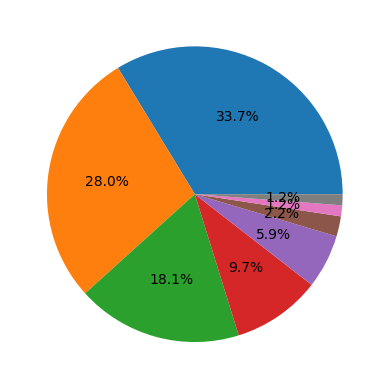

In [ ]:
plt.pie(data["Purpose"].value_counts(), autopct="%1.1f%%");

Наблюдается дизбаланс классов, но в рамках экзамена мы не можем сбалансировать датасет сгенерировав новые данные.

In [ ]:
data.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

Убираем колонки с null значениями

In [ ]:
data.dropna(axis=1, how="any", inplace=True)

In [ ]:
data.isna().sum()

Age              0
Sex              0
Job              0
Housing          0
Credit amount    0
Duration         0
Purpose          0
dtype: int64

Преобразовываем текстовые значения в числовые

In [ ]:
data['Sex'] = pd.factorize(data["Sex"])[0]
data['Housing'] = pd.factorize(data["Housing"])[0]

In [ ]:
X, y = data.drop(columns=["Purpose"]), data["Purpose"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=3)

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
models= [DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(),SVC()]
for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(model)
  scores = cross_val_score(model, X, y, cv=5)
  print(f"score = {model.score(X_test, y_test)}")
  print(f"cross-validation-score {scores.mean()}")
  print()

DecisionTreeClassifier()
score = 0.288
cross-validation-score 0.275

RandomForestClassifier()
score = 0.316
cross-validation-score 0.353

GradientBoostingClassifier()
score = 0.336
cross-validation-score 0.33999999999999997

KNeighborsClassifier()
score = 0.292
cross-validation-score 0.3

SVC()
score = 0.364
cross-validation-score 0.361



Самые лучшие значения показала SVC. Но все равно этой точности не хватает чтобы применять модель машинного обучения на реальных задчах.